#  ПРИКЛАД ВИКОНАННЯ ЛАБОРАТОРНОЇ РОБОТИ № 3. ПРОСТОРОВА ФІЛЬТРАЦІЯ
#  2. Підвіщення різкості зображення

In [2]:
## Завантаження пакетів
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
plt.rcParams['font.size'] = 18

In [3]:
## Завантаження файлу зображення
## filename = 'd:/_Doc_Vol_My_/_GIT_/2020/2020_Digita_Image_Processing/Test_Images/io_test_01.jpg'
filename = 'd:/_Doc_Vol_My_/_GIT_/2020/2020_Digita_Image_Processing/Test_Images/COCO_test_000579836.jpg'
test_im = io.imread(filename)
## Визначення стркутури та розміру зображення
print ('IMAGE SHAPE', test_im.shape, 'IMAGE SIZE', test_im.size)
## rows_num = len(test_im)
rows_num = test_im.shape[0] ## кількість рядків
clms_num = test_im.shape[1] ## кількість колонок
pix_num = rows_num*clms_num ## кількість пікселів
bins = 256 ## кількість рівнів яскравості
print ('ROWS NUMBER', rows_num, 'CLMS NUMBER', clms_num, 'PIX NUMBER', pix_num, 'Bins',bins)

IMAGE SHAPE (480, 640, 3) IMAGE SIZE 921600
ROWS NUMBER 480 CLMS NUMBER 640 PIX NUMBER 307200 Bins 256


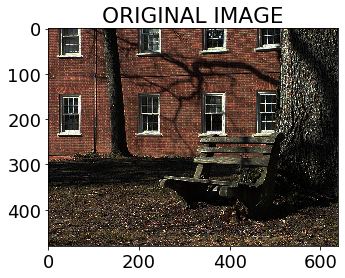

In [4]:
## Вивід оррігінального зображення на екран
plt.title('ORIGINAL IMAGE')
plt.imshow(test_im)
plt.show()

MASK SHAPE (3, 3, 1) MASK SIZE 9
1 1 0 0 [106  36  34] [-106  -36  -34]
1 1 0 1 [143  93  70] [-249 -129 -104]
1 1 0 2 [118  78  68] [-367 -207 -172]
1 1 1 0 [99 52 42] [-466 -259 -214]
1 1 1 1 [141  97  72] [803 614 434]
1 1 1 2 [132  83  76] [671 531 358]
1 1 2 0 [103  50  42] [568 481 316]
1 1 2 1 [122  82  56] [446 399 260]
1 1 2 2 [100  66  54] [346 333 206]
1 1 [141  97  72] [346 333 206] [ 90  77 206]
1 2 0 0 [99 52 42] [-99 -52 -42]
1 2 0 1 [141  97  72] [-240 -149 -114]
1 2 0 2 [132  83  76] [-372 -232 -190]
1 2 1 0 [103  50  42] [-475 -282 -232]
1 2 1 1 [122  82  56] [623 456 272]
1 2 1 2 [100  66  54] [523 390 218]
1 2 2 0 [111  54  47] [412 336 171]
1 2 2 1 [129  89  63] [283 247 108]
1 2 2 2 [99 70 56] [184 177  52]
1 2 [122  82  56] [184 177  52] [184 177  52]
1 3 0 0 [103  50  42] [-103  -50  -42]
1 3 0 1 [122  82  56] [-225 -132  -98]
1 3 0 2 [100  66  54] [-325 -198 -152]
1 3 1 0 [111  54  47] [-436 -252 -199]
1 3 1 1 [129  89  63] [725 549 368]
1 3 1 2 [99 70 56] [626

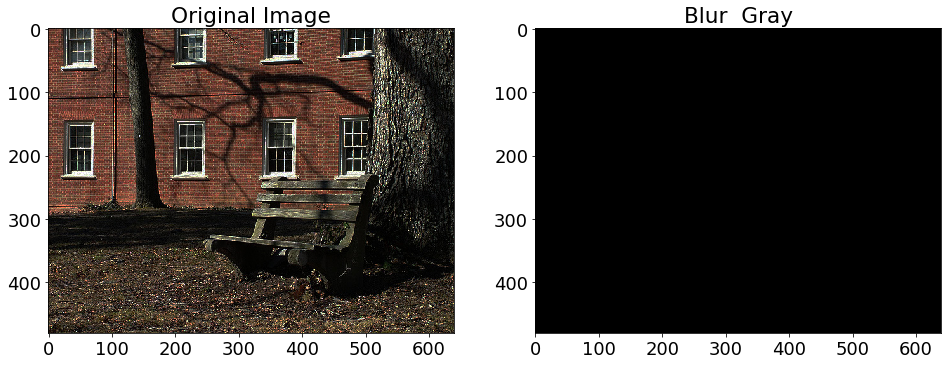

In [46]:
## Визначення маски фильтру підвищення різкості
mask_row = 3
mask_clm = 3
mask_sharp = np.zeros ( (mask_row, mask_clm, 1), dtype = np.int8)
print ('MASK SHAPE', mask_sharp.shape, 'MASK SIZE', mask_row*mask_clm)
mask_sharp[0,0] = mask_sharp[0,1] = mask_sharp[0,2] = -1 
mask_sharp[1,0] = mask_sharp[1,2] = -1 
mask_sharp[1,1] = 9
mask_sharp[2,0] = mask_sharp[2,1] = mask_sharp[2,2] = -1 

## print('FILTER MASK')
## print(mask_blur[:,:])

## Визначення файлу перетворенного зображення
filtr_im_ = np.zeros ( (rows_num, clms_num, 3), dtype = np.uint16)
filtr_im_sharp = np.zeros ( (rows_num, clms_num, 3), dtype = np.uint8)

pixel = np.zeros(3, dtype=np.int16)

#for i in  range (1, (rows_num-1), 1):
#    for j in  range (1, (clms_num -1), 1):
for i in  range (1, (5-1), 1):
    for j in  range (1, (5 -1), 1):
        pixel[:] = 0
        for l in range (mask_row):
            for k in range (mask_clm):
                # fiter image
                pixel += mask_sharp[l,k]*test_im [i-(1-k), j-(1-l), : ]
                print (i, j, l, k, test_im [i-(1-k), j-(1-l), : ], pixel)                        
        filtr_im_ [i, j, :] = pixel [:]
        print (i, j, test_im [i, j, : ], pixel[:], filtr_im_ [i, j, :])                        

max_pix_color = np.max(filtr_im_)
min_pix_color = np.min(filtr_im_)
print (min_pix_color, max_pix_color)
        
        
## СУМІСНИЙ ВИВІД ОРИГІНАЛЬНОГО ТА ПЕРЕТВОРЕНОГО ЗОБРАЖЕННЯ
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
ax = axes.ravel()
ax[0].imshow(test_im)
ax[0].set_title("Original Image")
ax[1].imshow(filtr_im_sharp)
ax[1].set_title("Blur  Gray")
plt.show()

## ГІСТОГРАМА РОЗМИТОГО ЗОБРАЖЕННЯ

Gray_Im SAPE (480, 640, 3) Gray_Im SIZE 307200
L_Gisto SHAPE (256,) L_Gisto SIZE 256


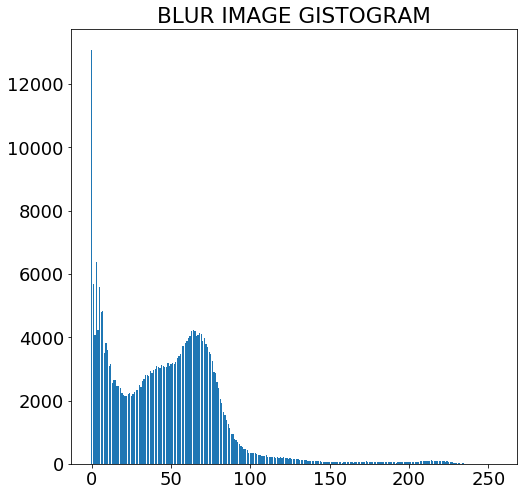

In [43]:
## Визначення масиву для гістограми РЗМИТОГО ЗОБРАЖЕННЯ
gray_im = np.zeros ( (rows_num, clms_num, 3), dtype=np.uint8)
L_gisto = np.zeros ( (bins), dtype=np.uint32)
print ('Gray_Im SAPE', gray_im.shape, 'Gray_Im SIZE', rows_num * clms_num)
print ('L_Gisto SHAPE', L_gisto.shape, 'L_Gisto SIZE', L_gisto.size)

for i in  range (rows_num):
    for j in  range (clms_num):
        # Gray image
        gray_im [i, j, :] = 0.299*filtr_im_blur[i, j, 0]+0.587*filtr_im_blur[i, j, 1]+0.114*filtr_im_blur[ i, j, 2]
        L_gisto[gray_im [i, j, 0]] += 1 
        
## Вивід ГІСТОГРАМИ
pix_index = np.arange(256) 
fig, ax = plt.subplots(figsize=(8,8))
plt.title('BLUR IMAGE GISTOGRAM')
ax.bar(pix_index, L_gisto)
plt.show()        
